# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from raw_to_transformed_data import get_sql_data

pd.set_option("display.max_columns", None)
plt.style.use("ggplot")
%matplotlib inline

In [2]:
query_crashes = """
    SELECT *
    FROM crashes;
    """
query_people = """
    SELECT *
    FROM people;
    """
dbname = "chi-traffic-accidents"

In [3]:
df_crashes = get_sql_data(dbname, query_crashes)

In [4]:
df_crashes.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,prim_contributory_cause,street_direction,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,intersection_related_i,hit_and_run_i,lane_cnt
0,7a63945a9bae12c05dee82c1962bf40f23cdd02ca655d7...,2021-08-01 03:42:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",DISREGARDING OTHER TRAFFIC SIGNS,S,2,0.0,3,1,8,None,None,NaN
1,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,2021-08-01 02:41:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,N,2,1.0,2,1,8,Y,Y,NaN
2,bba4db7cfef29230aa5d24f6b8912a2539b5d6f481a94e...,2021-08-01 02:26:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,S,2,0.0,2,1,8,None,None,NaN
3,1e39110c6e01fd2f24e282cd610eb90d6f98a6241ab193...,2021-08-01 02:22:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,S,2,1.0,2,1,8,N,Y,NaN
4,d20d9db8a88fc227d48392b45380ae57898e5fcdcda7db...,2021-08-01 02:08:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER LANE USAGE,W,3,2.0,2,1,8,None,Y,NaN


In [5]:
df_crashes.shape

(526569, 25)

In [6]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526569 entries, 0 to 526568
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   crash_record_id          526569 non-null  object        
 1   crash_date               526569 non-null  datetime64[ns]
 2   posted_speed_limit       526569 non-null  int64         
 3   traffic_control_device   526569 non-null  object        
 4   device_condition         526569 non-null  object        
 5   weather_condition        526569 non-null  object        
 6   lighting_condition       526569 non-null  object        
 7   first_crash_type         526569 non-null  object        
 8   trafficway_type          526569 non-null  object        
 9   alignment                526569 non-null  object        
 10  roadway_surface_cond     526569 non-null  object        
 11  road_defect              526569 non-null  object        
 12  report_type     

In [7]:
df_crashes.columns

Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'prim_contributory_cause', 'street_direction',
       'num_units', 'injuries_total', 'crash_hour', 'crash_day_of_week',
       'crash_month', 'intersection_related_i', 'hit_and_run_i', 'lane_cnt'],
      dtype='object')

In [8]:
for col in df_crashes.columns:
    if df_crashes[col].dtype not in ("datetime64[ns]", "int64", "float64"):
        if col in ("crash_record_id"):
            continue
        print(col, ":")
        print(list(df_crashes[col].unique()))
        print("")

traffic_control_device :
['NO CONTROLS', 'TRAFFIC SIGNAL', 'STOP SIGN/FLASHER', 'UNKNOWN', 'OTHER', 'RR CROSSING SIGN', 'YIELD', 'PEDESTRIAN CROSSING SIGN', 'OTHER REG. SIGN', 'OTHER RAILROAD CROSSING', 'POLICE/FLAGMAN', 'DELINEATORS', 'NO PASSING', 'OTHER WARNING SIGN', 'FLASHING CONTROL SIGNAL', 'RAILROAD CROSSING GATE', 'SCHOOL ZONE', 'BICYCLE CROSSING SIGN', 'LANE USE MARKING']

device_condition :
['NO CONTROLS', 'FUNCTIONING PROPERLY', 'FUNCTIONING IMPROPERLY', 'NOT FUNCTIONING', 'UNKNOWN', 'OTHER', 'WORN REFLECTIVE MATERIAL', 'MISSING']

weather_condition :
['CLEAR', 'UNKNOWN', 'SEVERE CROSS WIND GATE', 'OTHER', 'CLOUDY/OVERCAST', 'RAIN', 'FREEZING RAIN/DRIZZLE', 'SNOW', 'FOG/SMOKE/HAZE', 'SLEET/HAIL', 'BLOWING SNOW', 'BLOWING SAND, SOIL, DIRT']

lighting_condition :
['DARKNESS, LIGHTED ROAD', 'DUSK', 'DARKNESS', 'DAYLIGHT', 'DAWN', 'UNKNOWN']

first_crash_type :
['FIXED OBJECT', 'ANGLE', 'SIDESWIPE SAME DIRECTION', 'TURNING', 'PARKED MOTOR VEHICLE', 'REAR END', 'HEAD ON', 'REAR 

In [9]:
df_crashes["crash_date"].max()

Timestamp('2021-08-01 03:42:00')

In [10]:
df_crashes["crash_date"].min()

Timestamp('2013-03-03 16:48:00')

In [11]:
df_crashes["posted_speed_limit"].isna().sum()

0

In [12]:
for col in df_crashes.columns:
    if df_crashes[col].dtype not in ("datetime64[ns]", "int64", "float64"):
        if col in ("crash_record_id", "rd_no"):
            continue
        print(df_crashes[col].value_counts(dropna=False))
        print("")

NO CONTROLS                 303246
TRAFFIC SIGNAL              146500
STOP SIGN/FLASHER            52179
UNKNOWN                      16959
OTHER                         3222
LANE USE MARKING              1223
YIELD                          746
OTHER REG. SIGN                540
OTHER WARNING SIGN             465
RAILROAD CROSSING GATE         338
PEDESTRIAN CROSSING SIGN       234
POLICE/FLAGMAN                 195
SCHOOL ZONE                    175
DELINEATORS                    167
FLASHING CONTROL SIGNAL        162
OTHER RAILROAD CROSSING        123
RR CROSSING SIGN                53
NO PASSING                      25
BICYCLE CROSSING SIGN           17
Name: traffic_control_device, dtype: int64

NO CONTROLS                 306427
FUNCTIONING PROPERLY        182363
UNKNOWN                      28943
OTHER                         4077
FUNCTIONING IMPROPERLY        2742
NOT FUNCTIONING               1732
WORN REFLECTIVE MATERIAL       223
MISSING                         62
Name: devic

Name: hit_and_run_i, dtype: int64



In [13]:
df_people = get_sql_data(dbname, query_people)

In [14]:
df_people.head()

,person_id,person_type,crash_record_id,vehicle_id,city,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,driver_action,driver_vision,physical_condition,seat_no,pedpedal_action,pedpedal_visibility,pedpedal_location
0,O1152321,DRIVER,7a63945a9bae12c05dee82c1962bf40f23cdd02ca655d7...,1093058,ORLAND PARK,IL,M,39.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,OTHER,NOT OBSCURED,NORMAL,None,None,None,None
1,O1152305,DRIVER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093044,None,None,M,NaN,None,None,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,DISREGARDED CONTROL DEVICES,UNKNOWN,UNKNOWN,None,None,None,None
2,O1152306,DRIVER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,CHICAGO,IL,F,25.0,IL,None,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,NOT OBSCURED,NORMAL,None,None,None,None
3,P258653,PASSENGER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,CHICAGO,IL,M,NaN,None,None,USAGE UNKNOWN,NOT APPLICABLE,NONE,None,None,None,3,None,None,None
4,P258654,PASSENGER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,BLUE ISLAND,IL,F,NaN,None,None,USAGE UNKNOWN,DID NOT DEPLOY,NONE,None,None,None,4,None,None,None


In [15]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166012 entries, 0 to 1166011
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   person_id              1166012 non-null  object 
 1   person_type            1166012 non-null  object 
 2   crash_record_id        1166012 non-null  object 
 3   vehicle_id             1143065 non-null  object 
 4   city                   858745 non-null   object 
 5   state                  868812 non-null   object 
 6   sex                    1148473 non-null  object 
 7   age                    831949 non-null   float64
 8   drivers_license_state  688648 non-null   object 
 9   drivers_license_class  595129 non-null   object 
 10  safety_equipment       1162597 non-null  object 
 11  airbag_deployed        1144043 non-null  object 
 12  ejection               1151806 non-null  object 
 13  driver_action          925281 non-null   object 
 14  driver_vision     

In [16]:
df_people.columns

Index(['person_id', 'person_type', 'crash_record_id', 'vehicle_id', 'city',
       'state', 'sex', 'age', 'drivers_license_state', 'drivers_license_class',
       'safety_equipment', 'airbag_deployed', 'ejection', 'driver_action',
       'driver_vision', 'physical_condition', 'seat_no', 'pedpedal_action',
       'pedpedal_visibility', 'pedpedal_location'],
      dtype='object')

In [17]:
for col in df_people.columns:
    if df_people[col].dtype not in ("datetime64[ns]", "int64", "float64"):
        if col in ("person_id", "crash_record_id", "vehicle_id"):
            continue
        print(col, ":")
        print(list(df_people[col].unique()))
        print("")

person_type :
['DRIVER', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE', 'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE']

city :
['ORLAND PARK', None, 'CHICAGO', 'BLUE ISLAND', 'CICERO', 'GLEN HEIGHTS', 'LEVINE', 'ARLINGTON HEIGHTS', 'PARK RIDGE', 'LANSING', 'MAYWOOD', 'NORTHBROOK', 'OAK PARK', 'LAKE STATION', 'CROWN POINT', 'PALATINE', 'GLENWOOD', 'BARTLETT', 'BROOKFIELD', 'CHICAGO HEIGHTS', 'TINLEY PARK', 'WOODRIDGE', 'LA GRANGE', 'FOX LAKE', 'CHGO', 'MARSHALL', 'MARHSALL', 'HARWOOD HEIGHTS', 'ELMWOOD PARK', 'UNK', 'OAK FOREST', 'KATY', 'WESTMONT', 'SKOKIE', 'LIBERTYVILLE', 'HIGHWOOD', 'MORTON GROVE', 'DESPLAINE', 'DESPLAINES', 'NAPERVILLE', 'FLOSSMOOR', 'DOLTON', 'LYNWOOD', 'ROMEOVILLE', 'WAUKEGAN', 'CALUMET CITY', 'PALOS HILLS', 'JOLIET', 'PLEASANT HILL', 'IOWA CITY', 'AKRON', 'SAN ANTONIO', 'LAKEWOOD', 'PLAINFIELD', 'HAMMOND', 'WARRENVILLE', 'CHEVY CHASE', 'ROCKFORD', 'STONE PARK', 'FRANKLIN PARK', 'DECATUR', 'CHIACGO', 'OAK LAWN', 'ROYALTON', 'NO ROYALTON', 'CEDAR RAPIDS', 'ROBBINS', 'WHEELING

['IL', None, 'XX', 'IN', 'WI', 'NY', 'TX', 'MO', 'IA', 'OH', 'FL', 'OK', 'GA', 'MD', 'AL', 'CT', 'MI', 'UT', 'MA', 'PA', 'WA', 'NC', 'CA', 'OR', 'KY', 'AZ', 'TN', 'NJ', 'MT', 'MN', 'US', 'VA', 'CO', 'TY', 'II', 'NV', 'KS', 'NB', 'LA', 'CE', 'ON', 'EM', 'SQ', 'BC', 'PR', 'MM', 'JO', 'AR', 'NM', 'ND', 'ME', 'PO', 'MS', 'CB', 'NH', 'CD', 'VZ', 'SD', 'SC', 'NG', 'DE', 'GT', 'SR', 'DR', 'TH', 'ID', 'FN', 'AK', 'EY', 'RI', 'NL', 'HI', 'RA', 'UK', 'DC', 'GR', 'HD', 'LH', 'WY', 'B1', 'RC', 'PQ', 'WV', 'LD', 'KO', 'AG', 'AN', 'MC', 'EU', 'JM', 'EL', 'HL', 'RU', 'NU', 'PB', 'DO', 'IE', 'DF', 'GM', 'TC', 'SF', 'CK', 'QR', 'PK', 'NS', 'MB', 'CH', 'KT', 'KZ', 'PT', 'CL', 'EN', 'HK', 'RF', 'KU', 'BU', 'SG', 'YY', 'IS', 'CU', 'MG', 'SP', 'GG', 'AS', 'NZ', 'VT', 'SO', 'JL', 'SB', 'ZD', 'CY', 'LS', 'WG', 'CQ', 'SX', 'AV', 'GU', 'CW', 'AT', 'BF', 'GC', 'NK', 'AA', 'BZ', 'TW', 'ES', 'SZ', 'IT', 'BH', 'PU', 'HU', 'MR', 'SN', 'NA', 'UV', 'JA', 'BJ', 'DK', 'BA', 'NX', 'NI', 'IR', 'AM', 'PM', 'KN', 'TA', 'FD

In [18]:
for col in df_people.columns:
    if df_people[col].dtype not in ("datetime64[ns]", "int64", "float64"):
        if col in ("person_id", "vehicle_id", "zipcode", "drivers_license_class", 
                "bac_result", "hospital", "ems_agency", "ems_run_no", 
                "crash_record_id", "rd_no"):
            continue
        print(df_people[col].value_counts(dropna=False))
        print("")

DRIVER                 905027
PASSENGER              238499
PEDESTRIAN              13302
BICYCLE                  7959
NON-MOTOR VEHICLE        1011
NON-CONTACT VEHICLE       214
Name: person_type, dtype: int64

CHICAGO       607501
NaN           307267
CICERO          8505
SKOKIE          5661
BERWYN          4845
               ...  
ROSSELLE           1
GRAND BLVD         1
FRIENSWOOD         1
PALANETINE         1
WYNNEWOOD          1
Name: city, Length: 10436, dtype: int64

IL     821897
NaN    297200
IN      13256
XX       5937
WI       3989
MI       3194
FL       2084
TX       1730
OH       1609
CA       1557
IA       1228
GA       1099
MO       1035
MN       1026
NY        809
TN        687
WA        671
AZ        553
NC        506
PA        453
CO        414
KY        399
NJ        351
MS        348
VA        341
MA        320
MD        315
AL        295
ID        263
AR        256
NV        255
LA        223
NB        219
KS        196
OK        194
SC        189
CT        1

<AxesSubplot:>

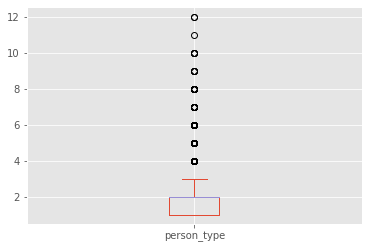

In [37]:
df_people.loc[df_people["person_type"]=="DRIVER", :].groupby("crash_record_id")["person_type"].count().plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

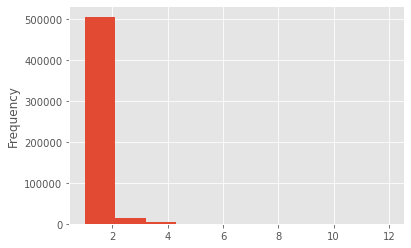

In [38]:
df_people.loc[df_people["person_type"]=="DRIVER", :].groupby("crash_record_id")["person_type"].count().plot(kind="hist")

In [41]:
df_people.loc[df_people["person_type"]=="DRIVER", :].groupby("crash_record_id")["person_type"].count().value_counts()

2     336192
1     170360
3      15382
4       3287
5        239
6        230
8         25
7         12
9          5
10         5
12         2
11         1
Name: person_type, dtype: int64

In [26]:
df_people.head()

,person_id,person_type,crash_record_id,vehicle_id,city,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,driver_action,driver_vision,physical_condition,seat_no,pedpedal_action,pedpedal_visibility,pedpedal_location
0,O1152321,DRIVER,7a63945a9bae12c05dee82c1962bf40f23cdd02ca655d7...,1093058,ORLAND PARK,IL,M,39.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,OTHER,NOT OBSCURED,NORMAL,None,None,None,None
1,O1152305,DRIVER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093044,None,None,M,NaN,None,None,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,DISREGARDED CONTROL DEVICES,UNKNOWN,UNKNOWN,None,None,None,None
2,O1152306,DRIVER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,CHICAGO,IL,F,25.0,IL,None,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,NOT OBSCURED,NORMAL,None,None,None,None
3,P258653,PASSENGER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,CHICAGO,IL,M,NaN,None,None,USAGE UNKNOWN,NOT APPLICABLE,NONE,None,None,None,3,None,None,None
4,P258654,PASSENGER,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,1093047,BLUE ISLAND,IL,F,NaN,None,None,USAGE UNKNOWN,DID NOT DEPLOY,NONE,None,None,None,4,None,None,None


## Report Type Influence on Injuries

In [19]:
df_crashes["report_type"].unique()

array(['ON SCENE', 'NOT ON SCENE (DESK REPORT)', None, 'AMENDED'],
      dtype=object)

In [20]:
df_crashes["report_type"].value_counts(dropna=False)

NOT ON SCENE (DESK REPORT)    298266
ON SCENE                      214961
NaN                            13102
AMENDED                          240
Name: report_type, dtype: int64

In [21]:
df_crashes.loc[df_crashes["report_type"]=="NOT ON SCENE (DESK REPORT)", "injuries_total"].value_counts(dropna=False)

0.0     284585
1.0      11149
2.0       1896
3.0        449
4.0        123
5.0         53
6.0          6
7.0          2
10.0         1
11.0         1
8.0          1
Name: injuries_total, dtype: int64

In [22]:
df_crashes.loc[df_crashes["report_type"]=="NOT ON SCENE (DESK REPORT)", "injuries_total"].mean()

0.05741184043773008

In [23]:
df_crashes.loc[df_crashes["report_type"]=="ON SCENE", "injuries_total"].value_counts(dropna=False)

0.0     162869
1.0      38742
2.0       8869
3.0       2793
4.0       1039
5.0        380
6.0        157
7.0         58
8.0         20
9.0         14
10.0         6
11.0         4
15.0         3
13.0         2
21.0         2
12.0         1
19.0         1
16.0         1
Name: injuries_total, dtype: int64

In [24]:
df_crashes.loc[df_crashes["report_type"]=="ON SCENE", "injuries_total"].mean()

0.33872655970152726

Records with reported thru desk report.

In [25]:
df_crashes.loc[df_crashes["report_type"]=="NOT ON SCENE (DESK REPORT)", :]

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,prim_contributory_cause,street_direction,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,intersection_related_i,hit_and_run_i,lane_cnt
1,d207ce72f4348fa06dddcd98628d0dec81d4f195cb8d8b...,2021-08-01 02:41:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,N,2,1.0,2,1,8,Y,Y,NaN
9,faac87c1a54fe9076ff10af7d63cdf0b449ebdbec628e6...,2021-08-01 01:10:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,W,2,0.0,1,1,8,None,None,NaN
14,6e07891daab5c12e7c874780e32c031ffc6669343c0872...,2021-08-01 00:10:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,S,2,0.0,0,1,8,Y,Y,NaN
15,587510b827b2f7df2790c07be6e9074d872d629c1802cc...,2021-08-01 00:05:00,30,STOP SIGN/FLASHER,FUNCTIONING IMPROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,S,2,0.0,0,1,8,None,None,NaN
18,59184d0f7ca439c6fa5a9bdf6686d8aedd7c6113d85a47...,2021-07-31 23:30:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,S,2,0.0,23,7,7,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526562,b15daae7f809226ff0cfc93865ddcf9ff60edcf4187dc4...,2014-11-11 20:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,W,2,0.0,20,3,11,None,None,NaN
526563,7d32d80bb700ef9b9474d40b764a8397b11e46033a1739...,2014-08-20 16:50:00,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,E,2,0.0,16,4,8,None,None,2.0
526564,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,2014-06-25 19:00:00,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER OVERTAKING/PASSING,S,2,0.0,19,4,6,None,Y,NaN
526565,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,2014-02-24 19:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,N,2,0.0,19,2,2,None,None,NaN
